In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('Walmart_sales.csv')

In [13]:
print("Dataset shape:", data.shape)
print("Dataset columns:", data.columns)
print("Dataset description:\n", data.describe())

Dataset shape: (6435, 8)
Dataset columns: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
Dataset description:
              Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std     

In [14]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


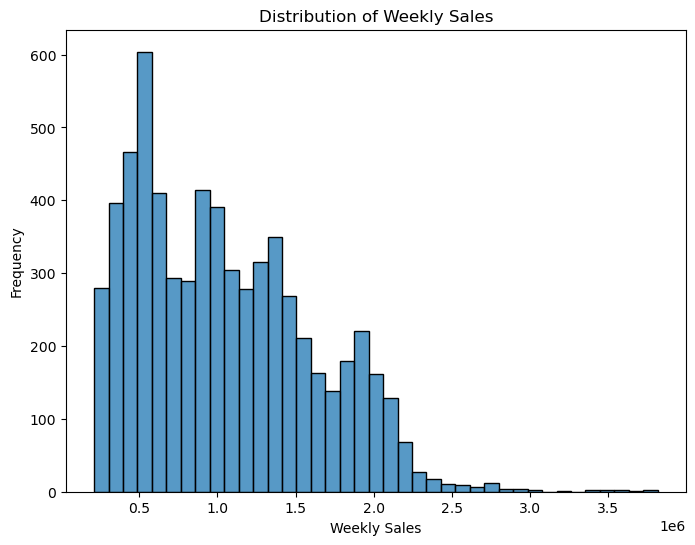

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Weekly_Sales'], kde=False)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly Sales")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

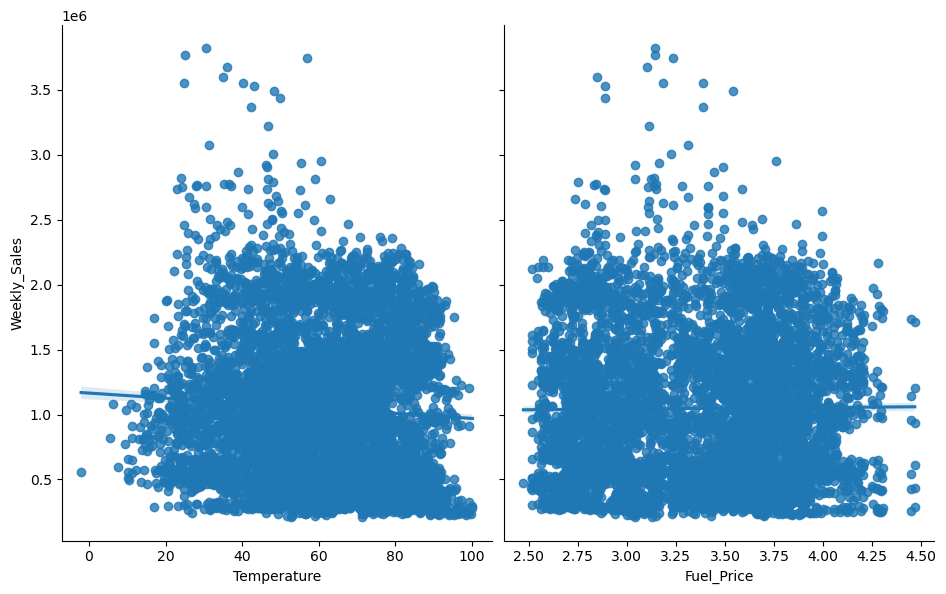

In [19]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, x_vars=['Temperature', 'Fuel_Price'], y_vars='Weekly_Sales', height=6, aspect=0.8, kind='reg')
plt.show()

In [24]:
features = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = data[features]
y = data['Weekly_Sales']
print(X)

      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106

In [23]:
from datetime import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').timestamp())
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']
print(X)

      Store          Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1  1.265308e+09             0        42.31       2.572  211.096358   
1         1  1.265913e+09             1        38.51       2.548  211.242170   
2         1  1.266518e+09             0        39.93       2.514  211.289143   
3         1  1.267123e+09             0        46.63       2.561  211.319643   
4         1  1.267727e+09             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45  1.348771e+09             0        64.88       3.997  192.013558   
6431     45  1.349375e+09             0        64.89       3.985  192.170412   
6432     45  1.349980e+09             0        54.47       4.000  192.327265   
6433     45  1.350585e+09             0        56.47       3.969  192.330854   
6434     45  1.351190e+09             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106

In [8]:
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 274573999190.1549
Root Mean Squared Error (RMSE): 523998.0908268225
R-squared (R2): 0.14769483554477658


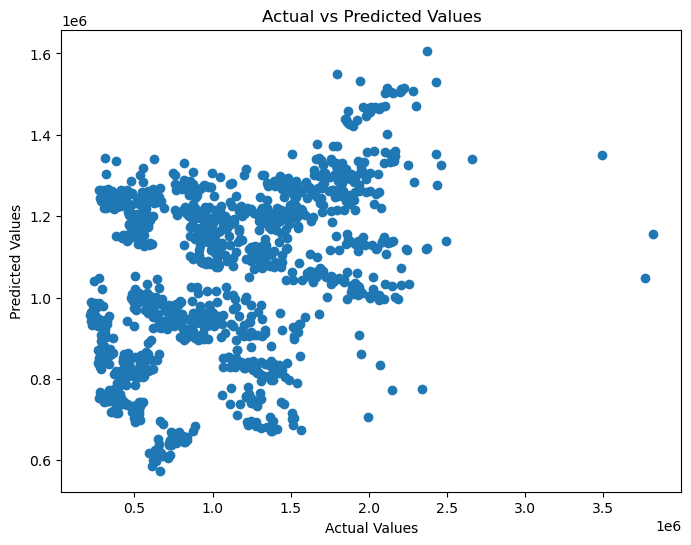

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [10]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:\n", coefficients)
print("Intercept:", model.intercept_)

Coefficients:
         Feature   Coefficient
0         Store -15096.223764
1          Date      0.000276
2  Holiday_Flag  74681.061453
3   Temperature   -776.161452
4    Fuel_Price -16392.270266
5           CPI  -2344.933555
6  Unemployment -23804.073368
Intercept: 1723235.539744434


In [11]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_)})
importance = importance.sort_values('Importance', ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
         Feature    Importance
2  Holiday_Flag  74681.061453
6  Unemployment  23804.073368
4    Fuel_Price  16392.270266
0         Store  15096.223764
5           CPI   2344.933555
3   Temperature    776.161452
1          Date      0.000276
